<p align="center">
  <b><font size="6">LAPTOP PRICE PREDICTION</font></b>
</p>



# Table of Contents

1. [Introduction](#introduction)
2. [Problem Statement](#problem-statement)
3. [Installing & Importing Libraries](#installing-importing-libraries)
4. [Data Exploration](#Data-Exploration)
5. [Data Pre-Profiling](#Data-Pre-Profiling)
6. [Feature Selection](#feature-selection)
7. [Model Selection](#model-selection)
8. [Model Evaluation](#model-evaluation)
9. [User Interface](#user-interface)
10. [Conclusion](#conclusion)


## Introduction <a id="introduction"></a>

In our tech-filled world, there are so many laptops with different features and prices. Figuring out how much a laptop should cost can be confusing for both companies and shoppers. This project is all about using computers to guess the right price for a laptop. We look at lots of laptops from the past to teach the computer how prices are decided. By doing this, we want to make it easier for everyone to know how much a laptop should cost and what things make it more expensive or cheaper.

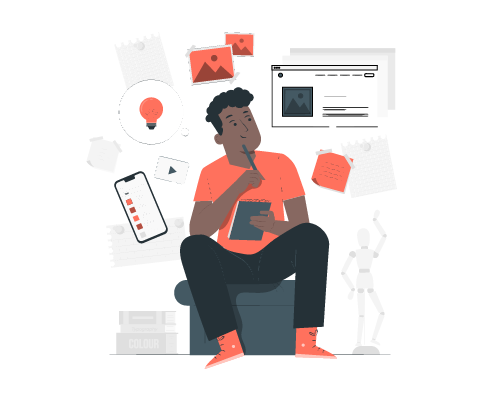

## Problem Statement <a id="problem-statement"></a>
The problem we're tackling involves creating a project focused on predicting laptop prices. Our goal is to develop an application that helps users who want to buy a laptop. This application should be able to give them an estimated price for the laptop they're interested in. In simpler terms, we aim to build a tool that suggests a rough idea of how much a laptop might cost to users looking to make a purchase decision.

## Installing & Importing Libraries <a id="installing-importing-libraries"></a>
Show how to install and import necessary libraries.

In [97]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns                                                
import ydata_profiling as pp
%matplotlib inline



- **pandas as pd**: This library provides data structures and data analysis tools for manipulating and analyzing structured data, making it easier to work with datasets.

- **numpy as np**: NumPy is a library for numerical computations in Python. It provides support for arrays, matrices, and mathematical functions, which are essential for data manipulation and analysis.

- **matplotlib.pyplot as plt**: Matplotlib is a popular data visualization library. The `pyplot` module provides functions to create various types of plots and visualizations.

- **seaborn as sns**: Seaborn is built on top of Matplotlib and provides a high-level interface for creating informative and attractive statistical graphics, enhancing the visual aesthetics of your plots.

- **ydata_profiling as pp**: `ydata_profiling` is a library that generates data profiles, summaries, and exploratory analysis reports for datasets, helping you understand the data's structure and characteristics.

- **%matplotlib inline**: This is a magic command in Jupyter Notebook that allows Matplotlib plots to be displayed directly within the notebook interface.

Note: The explanations provided above are general summaries of the functionalities of the imported libraries.


In [99]:
data=pd.read_csv("D:\\PERSONAL DATA\\DATA SCIENCE\\INSAID\\DATA SCIENCE PROJECTS\\Term 3 Project\\LAPTOP PRICE PREDICTOR REGRESSION PROJECT\\laptop_data.csv")
print(data.shape)
data.head()

(1303, 12)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Data Pre-Profiling <a id="Data-Pre-Profiling"></a>

Data Pre-Profiling is the initial step in data analysis where the characteristics, quality, and structure of a dataset are assessed to understand its content and identify potential issues.


In [100]:
profile = pp.ProfileReport(data)
profile.to_file('D:\PERSONAL DATA\DATA SCIENCE\INSAID\DATA SCIENCE PROJECTS\Term 3 Project\LAPTOP PRICE PREDICTOR REGRESSION PROJECT/laptop_price_pre_profiling.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Exploration <a id="data-exploration"></a>

Many columns within the dataset exhibit noise yet hold significant information. Employing feature engineering can yield improved outcomes. The challenge lies in the dataset's limited size; nevertheless, you anticipate achieving commendable accuracy through skillful techniques. While ample data is advantageous, the potency of thoughtful feature engineering can counterbalance the data shortage. The endeavor involves creating a website to estimate laptop prices based on user configurations


Below are the Data Dictionaries present in dataset 


| Column Name       | Description                                           |
|-------------------|-------------------------------------------------------|
| Company           | The brand or company that manufactures the laptop.    |
| TypeName          | The general type or category of the laptop.           |
| Inches            | The size of the laptop screen in inches.              |
| ScreenResolution  | The display resolution of the laptop screen.          |
| Cpu               | The central processing unit (processor) of the laptop.|
| Ram               | The amount of random-access memory (RAM) in the laptop.|
| Memory            | The storage capacity of the laptop's memory.          |
| Gpu               | The graphics processing unit (GPU) of the laptop.     |
| OpSys             | The operating system installed on the laptop.         |
| Weight            | The weight of the laptop.                             |
| Price             | The price of the laptop.                              |



### Data Cleaning and Preprocessing

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Requried Data Cleaning Steps on datasets
- Unnamed:0 column need to remove from dataset 
- will have to work on ScreenResolutions screen resolutions are in diffrent formats 
    - TouchScreen
    - IPS Panel
    - Resolutions
        - created data['x-res'] data['y-res'] and changed Dtype from  obejct to int


- will check if we need to change the Cpu feature and serperate with core and speed 
- Ram Column has GB added and it is in object dtype we need to remove GB and Dtype Int
- weight is also in object format will remove the Kg and Dtype will be float
- price will change to int we dont require Price in Float 

####  Unnamed:0 column need to remove from dataset 


In [102]:
data=data.drop("Unnamed: 0", axis=1)


In [103]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [104]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

####  Resolutions 

- will seperate out the resolutions on x_res and y_res 1920x1200 in seperate column
- data['x-res'] data['y-res'] are in obejct Dtype will change it to int

In [105]:
new=data['ScreenResolution'].str.split("x", n=1, expand=True) 


In [106]:
data['x-res']=new[0]
data['y-res']=new[1]

- **data['x-res']= data['x-res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])**:
  - This code replaces commas in the 'x-res' column, then uses a regular expression to extract numerical values and applies a lambda function to keep the first extracted value.

- **data.info()**:
  - This command displays a concise summary of the DataFrame 'data', including the data types of columns and memory usage information.


In [107]:
data['x-res']= data['x-res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  x-res             1303 non-null   object 
 12  y-res             1303 non-null   object 
dtypes: float64(2), object(11)
memory usage: 132.5+ KB


In [108]:
data['x-res']=data['x-res'].astype(int)
data['y-res']=data['y-res'].astype(int)

- Changed Object Dtype to Int

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  x-res             1303 non-null   int32  
 12  y-res             1303 non-null   int32  
dtypes: float64(2), int32(2), object(9)
memory usage: 122.3+ KB


####  will take the backup of our data 

In [110]:
backup=data.copy()

#### IPS Panel

- From the 'screenResolutions' column, we've split the data to create two new columns: one indicating whether an IPS display is present and another indicating the presence of a touchscreen feature.

In [111]:
data['IPS Panel']=data['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0 )
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x-res,y-res,IPS Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560,1600,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440,900,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920,1080,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880,1800,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560,1600,1


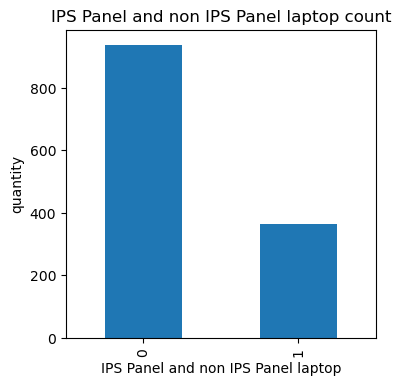

In [112]:
paper=plt.figure(figsize=(4,4))
data['IPS Panel'].value_counts().plot(kind='bar')
plt.title("IPS Panel and non IPS Panel laptop count")
plt.xlabel("IPS Panel and non IPS Panel laptop")
plt.ylabel("quantity")
plt.xticks(rotation='vertical')
plt.show()


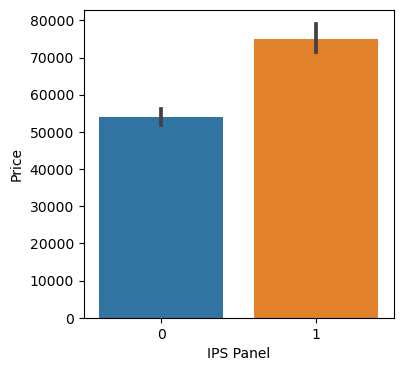

In [113]:
paper=plt.figure(figsize=(4,4))
sns.barplot(data=data,x=data['IPS Panel'], y=data['Price'])
plt.show()

#### Touchscreen 

In [114]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0 )

In [115]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x-res,y-res,IPS Panel,Touchscreen
295,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.2kg,69210.720,1920,1080,1,0
106,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 520,Windows 10,1.85kg,22105.872,1920,1080,0,0
1237,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 7,2.24kg,39267.360,1366,768,0,0
1286,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.120,1366,768,0,0
547,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,2.15kg,24634.008,1920,1080,0,0
931,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.26kg,84129.120,1920,1080,0,0
268,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,54239.040,1920,1080,0,0
349,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,AMD Radeon 530,Windows 10,1.9kg,35324.640,1920,1080,0,0
975,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,52161.120,1920,1080,1,0
457,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core M m3-7Y30 2.2GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10 S,1.252kg,52693.920,2256,1504,0,1


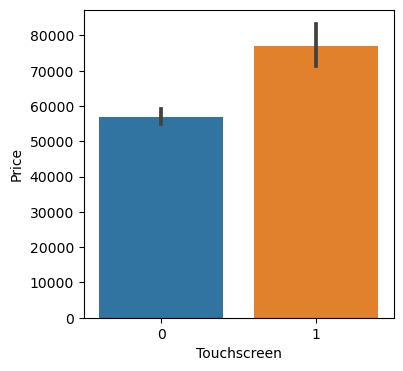

In [116]:
paper=plt.figure(figsize=(4,4))
sns.barplot(data=data,x=data['Touchscreen'], y=data['Price'])
plt.show()

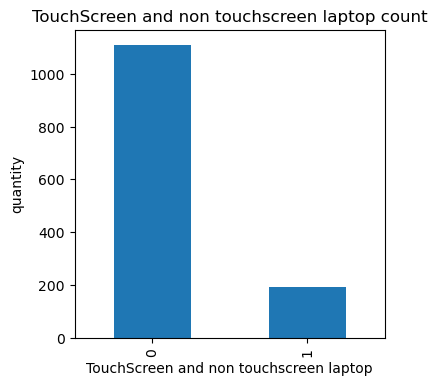

In [117]:
paper=plt.figure(figsize=(4,4))
data['Touchscreen'].value_counts().plot(kind='bar')
plt.title("TouchScreen and non touchscreen laptop count")
plt.xlabel("TouchScreen and non touchscreen laptop")
plt.ylabel("quantity")
plt.xticks(rotation='vertical')
plt.show()


#### Ram Column has GB added and it is in object dtype we need to remove GB and Dtype Int

In [118]:
data['Ram']=data['Ram'].str.replace("GB",'')

In [119]:
data['Ram']=data['Ram'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  x-res             1303 non-null   int32  
 12  y-res             1303 non-null   int32  
 13  IPS Panel         1303 non-null   int64  
 14  Touchscreen       1303 non-null   int64  
dtypes: float64(2), int32(3), int64(2), object(8)
memory usage: 137.6+ KB


#### weight is also in object format will remove the Kg and Dtype will be float 

In [120]:
data['Weight']=data['Weight'].str.replace("kg",'')
data['Weight']=data['Weight'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  x-res             1303 non-null   int32  
 12  y-res             1303 non-null   int32  
 13  IPS Panel         1303 non-null   int64  
 14  Touchscreen       1303 non-null   int64  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


####  price will change to int we dont require Price in Float 

In [121]:
data['Price']=data['Price'].astype(int)

In [122]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x-res,y-res,IPS Panel,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,2560,1600,1,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,1440,900,0,0


## Feature Selection <a id="feature-selection"></a>
Explain how you selected the features for your model.

###  Correlations

In [123]:
data.corr()


,Inches,Ram,Weight,Price,x-res,y-res,IPS Panel,Touchscreen
Inches,1.000000,0.237993,0.827631,0.068196,-0.071245,-0.095404,-0.114804,-0.361735
Ram,0.237993,1.000000,0.383874,0.743007,0.433121,0.424437,0.206623,0.116984
Weight,0.827631,0.383874,1.000000,0.210370,-0.032880,-0.053846,0.016967,-0.294620
Price,0.068196,0.743007,0.210370,1.000000,0.556529,0.552809,0.252207,0.191226
x-res,-0.071245,0.433121,-0.032880,0.556529,1.000000,0.994219,0.281457,0.351066
y-res,-0.095404,0.424437,-0.053846,0.552809,0.994219,1.000000,0.289030,0.357930
IPS Panel,-0.114804,0.206623,0.016967,0.252207,0.281457,0.289030,1.000000,0.150512
Touchscreen,-0.361735,0.116984,-0.294620,0.191226,0.351066,0.357930,0.150512,1.000000


In [124]:
price_corr=round(data.corr()['Price']*100)
print("Correlation with Price :\n\n{} %".format(price_corr))

Correlation with Price :

Inches           7.0
Ram             74.0
Weight          21.0
Price          100.0
x-res           56.0
y-res           55.0
IPS Panel       25.0
Touchscreen     19.0
Name: Price, dtype: float64 %


- From the above Price Corr we could see the x_res and y_res have same correlations so by using these column with inches we will find out the PPI (pixels per inches )

###  PPI Column addition on Dataset
formulation of PPI
- x_res squar
- y_res squar
- addition of x_res+y_res squar
- plus root of inches 

In [125]:
data['ppi'] = (((data['x-res']**2) + (data['y-res']**2))**0.5/data['Inches']).astype(float)

In [126]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x-res,y-res,IPS Panel,Touchscreen,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,2560,1600,1,0,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,1440,900,0,0,127.677940


In [127]:
price_corr=round(data.corr()['Price']*100)
print("Correlation with Price :\n\n{} %".format(price_corr))

Correlation with Price :

Inches           7.0
Ram             74.0
Weight          21.0
Price          100.0
x-res           56.0
y-res           55.0
IPS Panel       25.0
Touchscreen     19.0
ppi             47.0
Name: Price, dtype: float64 %


- we have captured all the information required from **ScreenResolutions** now we dont need that column so we will drop from the dataset
- we have created the PPI column so we dont need these **inches , x-res and y-res** columns so we will drop them

In [128]:
data.drop(columns=['ScreenResolution'], inplace=True)


In [129]:
data.drop(columns=['Inches','x-res','y-res'], inplace=True)

In [130]:
data['Cpu'].value_counts().sort_values(ascending=False).head()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
Name: Cpu, dtype: int64

In [131]:
data['cpu name']=data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [132]:
#data=data.drop(['first_word'], axis=1)
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,Touchscreen,ppi,cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226.983005,Intel Core i5


The provided code defines a function named `fetch_processor` that categorizes processor types based on the given text input.

- **if text=="Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":**
  This line checks if the input text matches any of the specified Intel Core processors (i7, i5, i3), returning the matching text if true.

- **else:**
  If the text doesn't match the above conditions, the following steps are performed:

  - **if text.split()[0] == 'Intel':**
    This line checks if the first word in the input text is 'Intel'. If true, it categorizes the processor as 'Other Intel Processor'.

  - **else:**
    If the first word is not 'Intel', the code categorizes the processor as 'AMD Processor'.

In summary, the function categorizes processor types into specific Intel Core models or broader categories like 'Other Intel Processor' and 'AMD Processor' based on the input text.


In [133]:
def fetch_processor(text):
    if text=="Intel Core i7" or text == "Intel Core i5" or  text == "Intel Core i3" :
        return text
    else: 
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else: 
            return 'AMD Processor'

In [134]:
data['cpu brands']=data['cpu name'].apply(fetch_processor)
                                         

<AxesSubplot:>

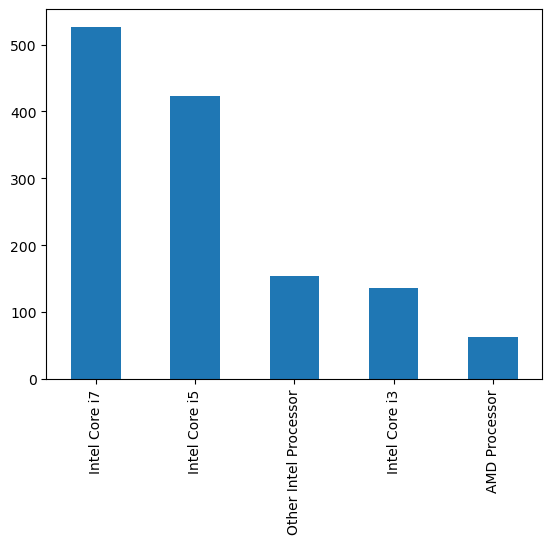

In [135]:
data['cpu brands'].value_counts().plot(kind='bar')

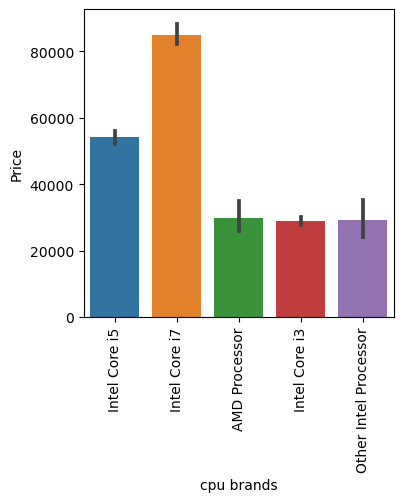

In [136]:
paper=plt.figure(figsize=(4,4))
sns.barplot(data=data,x=data['cpu brands'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [137]:
#drop cpu and cpu name 

data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,Touchscreen,ppi,cpu name,cpu brands
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

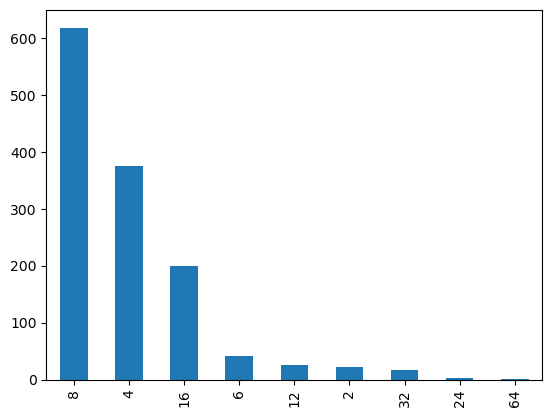

In [139]:
data['Ram'].value_counts().plot(kind='bar')

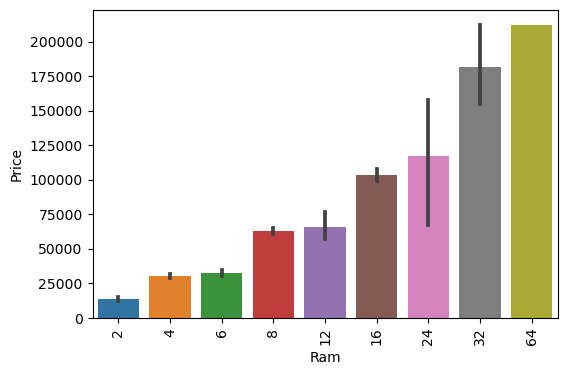

In [293]:
paper=plt.figure(figsize=(6,4))
sns.barplot(data=data,x=data['Ram'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### Memory columns 

In [300]:
laptop_backup=data.drop(columns=(['Memory_size','Memory_type'] ),axis=1)

In [416]:
df=pd.DataFrame(laptop_backup)

In [418]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,Touchscreen,ppi,cpu name,cpu brands
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226.983005,Intel Core i5,Intel Core i5


In [427]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory'] = df['Memory'].str.replace("GB","")
df['Memory'] = df['Memory'].str.replace("TB","000")
new =df['Memory'].str.split("+", n=1, expand=True)
df['first']=new[0]
df['first']=df['first'].str.strip()

df['layer1hdd']=df['first'].apply(lambda x:1 if "HDD" in x else 0)
df['layer1ssd']=df['first'].apply(lambda x:1 if "SSD" in x else 0)
df['layer1hybrid']=df['first'].apply(lambda x:1 if "Hybrid" in x else 0)
df['layer1falsh_storage']=df['first'].apply(lambda x:1 if "Flash_Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D','')
df['second']=new[1]
df['second'].fillna('0', inplace=True)

df['layer2hdd']=df['second'].apply(lambda x:1 if "HDD" in x else 0)
df['layer2ssd']=df['second'].apply(lambda x:1 if "SSD" in x else 0)
df['layer2hybrid']=df['second'].apply(lambda x:1 if "Hybrid" in x else 0)
df['layer2falsh_storage']=df['second'].apply(lambda x:1 if "Flash_Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D','')

df['first']=df['first'].astype(int)
df['second'] = df['second'].astype(int)

# print(df['first'].sample())
# print(df['layer1hdd'].sample())
# print(df['second'].sample())
# print(df['layer2hdd'].sample())



df['HDD']=(df['first']*df['layer1hdd']+df['second']*df['layer2hdd'])
df['SSD']=(df['first']*df['layer1ssd']+df['second']*df['layer2ssd'])
df['Hybrid']=(df['first']*df['layer1hybrid']+df['second']*df['layer2hybrid'])
df['Flash_Storage']=(df['first']*df['layer1falsh_storage']+df['second']*df['layer2falsh_storage'])

df.drop(columns=['first', 'second', 'layer1hdd', 'layer1ssd', 'layer1hybrid',
       'layer1falsh_storage', 'layer2hdd', 'layer2ssd', 'layer2hybrid',
       'layer2falsh_storage', ], inplace=True)



# df['second']=new[1]
# df['second']=df['second'].str.strip()
# df['second']


C:\Users\prashantkumar.sundge\AppData\Local\Temp\ipykernel_13696\495736660.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')
C:\Users\prashantkumar.sundge\AppData\Local\Temp\ipykernel_13696\495736660.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D','')


The provided code performs several transformations on the 'Memory' column of the DataFrame 'df':

1. **Cleaning and Splitting Memory Information**:

   - The 'Memory' column is converted to a string and decimals are removed.
   - 'GB' is removed, and 'TB' is converted to '000'.
   - The 'Memory' column is split using the '+' separator, creating a new DataFrame 'new'.
   - The 'first' column of 'new' is created, representing the first part of the memory information.
   - The 'first' column is cleaned by removing non-numeric characters.
   - Flags ('layer1hdd', 'layer1ssd', etc.) are set based on the presence of specific terms (e.g., 'HDD', 'SSD') in 'first'.

2. **Further Processing**:

   - The 'second' column of 'new' is created, representing the second part of the memory information.
   - Missing values in 'second' are filled with '0'.
   - Similar flags for storage types are set based on the presence of terms in the 'second' column.
   - Non-numeric characters are removed from the 'second' column.

3. **Conversion and Calculation**:

   - 'first' and 'second' columns are converted to integers.
   - Storage types ('HDD', 'SSD', 'Hybrid', 'Flash_Storage') are calculated based on the multiplication of 'first' and respective flags.
   - Columns and flags related to intermediate steps are dropped.

Overall, the code cleans and splits memory information, sets flags for storage types, performs calculations, and simplifies the representation of storage types in the DataFrame 'df'.


In [398]:

df.drop(columns=(['first' ,'layer1hdd', 'layer1ssd' ,'layer1hybrid' ,'layer1falsh_storage']), inplace=True)

In [429]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,Touchscreen,ppi,cpu name,cpu brands,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226.983005,Intel Core i5,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220.534624,Intel Core i7,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226.983005,Intel Core i5,Intel Core i5,0,256,0,0


In [430]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
IPS Panel        0.252207
Touchscreen      0.191226
ppi              0.473487
HDD             -0.096442
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

In [432]:
df.drop(columns=['Hybrid','Flash_Storage'], inplace =True)

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float64
 8   Price        1303 non-null   int32  
 9   IPS Panel    1303 non-null   int64  
 10  Touchscreen  1303 non-null   int64  
 11  ppi          1303 non-null   float64
 12  cpu name     1303 non-null   object 
 13  cpu brands   1303 non-null   object 
 14  HDD          1303 non-null   int64  
 15  SSD          1303 non-null   int64  
dtypes: float64(2), int32(2), int64(4), object(8)
memory usage: 152.8+ KB


In [436]:
df["gpu_model"]=df["Gpu"].apply(lambda x:x.split(" ")[0])

**GPU Model**:

   - The GPU model has lot more information **Intel Iris Plus Graphics 640** 
   - So we removed all the info and considered only first name Intel or AMD like that
   - by considering other elements from GPU was not given more info or Corr so we removed

In [445]:
df=df[df["gpu_model"] != 'ARM']


<AxesSubplot:>

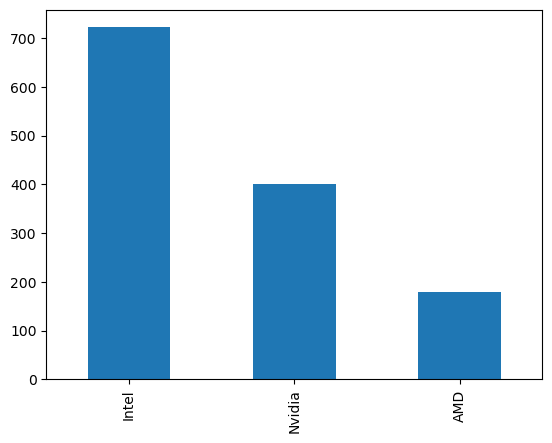

In [446]:
df["gpu_model"].value_counts().plot(kind='bar')

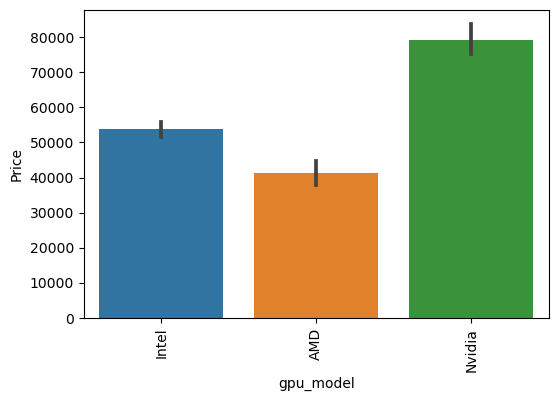

In [447]:
paper=plt.figure(figsize=(6,4))
sns.barplot(data=df,x=df['gpu_model'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [449]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

<AxesSubplot:>

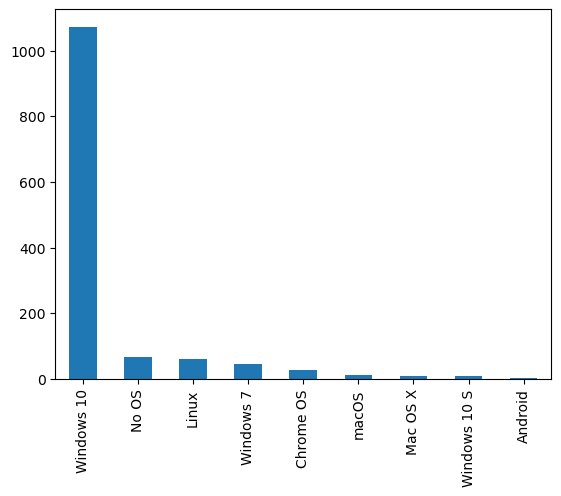

In [450]:
df['OpSys'].value_counts().plot(kind='bar')

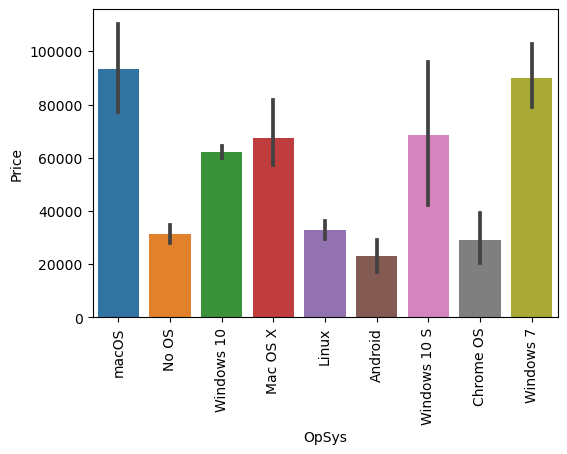

In [451]:
paper=plt.figure(figsize=(6,4))
sns.barplot(data=df,x=df['OpSys'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

The provided code defines a function named `os_cat` that categorizes operating systems based on the given input.

- **if inp == "Windows 10" or inp == 'Windows 7' or inp == 'Windows 10 S':**
  This condition checks if the input 'inp' matches any of the specified Windows operating systems, returning "Windows" if true.

- **elif inp == "macOS" or inp == 'Mac OS X':**
  If the first condition is false, this condition checks if the input 'inp' matches any of the specified macOS operating systems, returning "Mac" if true.

- **else:**
  If neither of the above conditions is true, the code categorizes the operating system as "Others/No OS/Linux".

The `df['OS']=df['OpSys'].apply(os_cat)` line applies the `os_cat` function to the 'OpSys' column of the DataFrame 'df', creating a new 'OS' column with the categorized operating systems.


In [453]:
def os_cat(inp):
    if inp == "Windows 10" or inp == 'Windows 7' or inp == 'Windows 10 S':
        return "Windows"
    elif inp == "macOS" or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [455]:
df['OS']=df['OpSys'].apply(os_cat)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,Touchscreen,ppi,cpu name,cpu brands,HDD,SSD,gpu_model,OS
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,1,0,226.983005,Intel Core i5,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636,0,0,141.211998,Intel Core i5,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195,1,0,220.534624,Intel Core i7,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,1,0,226.983005,Intel Core i5,Intel Core i5,0,256,Intel,Mac


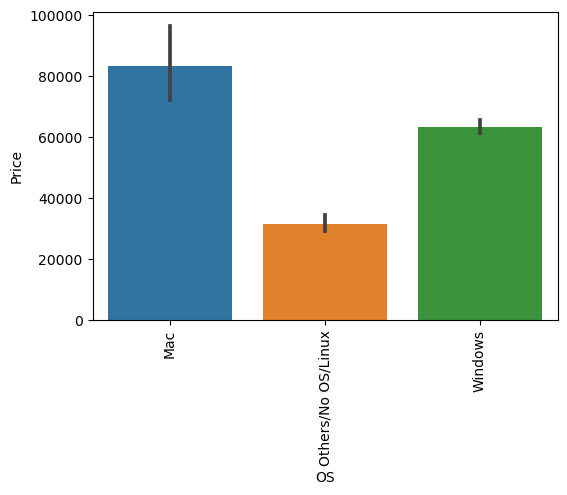

In [456]:
paper=plt.figure(figsize=(6,4))
sns.barplot(data=df,x=df['OS'], y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

The code utilizes Seaborn's `sns.distplot` function to create a histogram of the distribution of prices in the DataFrame 'df'.

- **sns.distplot(df['Price'])**:
  This line generates a histogram plot of the 'Price' column, showing the frequency distribution of different price values.

Since the distribution of the prices is skewed, a common technique to address this skewness and enhance visualization is to apply the natural logarithm transformation.

- **np.log(df['Price'])**:
  This expression applies the natural logarithm (base e) transformation to the 'Price' column using NumPy's `np.log` function.

By using `np.log(df['Price'])`, the code creates a transformed version of the 'Price' column, allowing for better visualization of the data with reduced skewness.


C:\Users\prashantkumar.sundge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

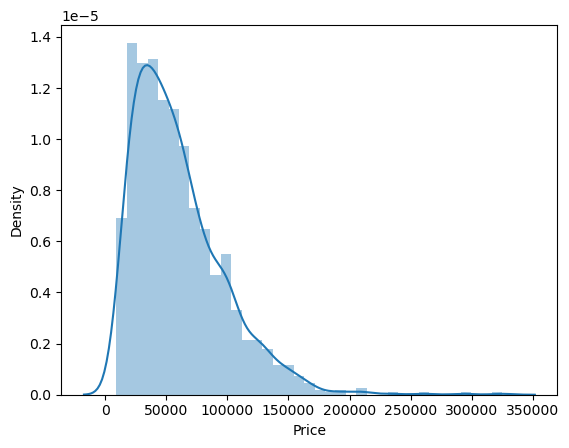

In [480]:
sns.distplot(df['Price'])

####  will apply log transofrmation for price 


C:\Users\prashantkumar.sundge\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

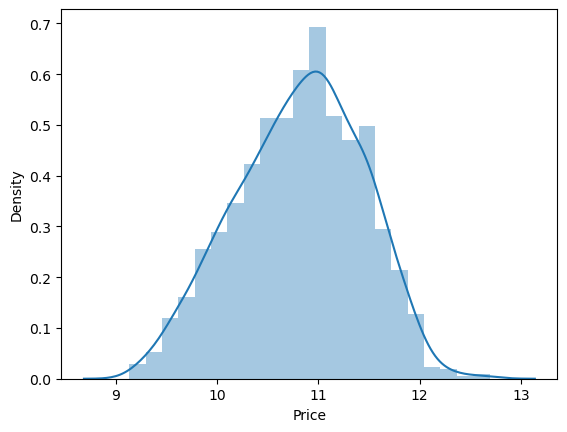

In [478]:
sns.distplot(np.log(df['Price']))

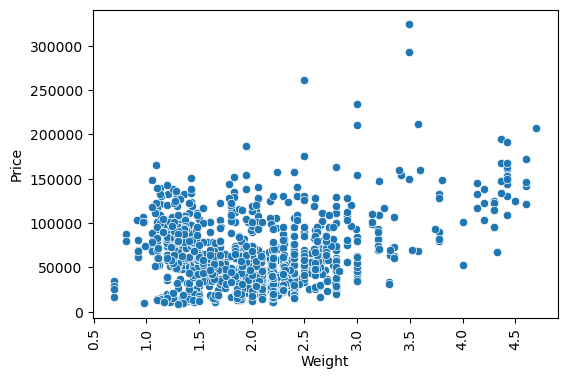

In [466]:
paper=plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x=df['Weight'], y=data['Price'], estimator='meadian')
plt.xticks(rotation='vertical')
plt.show()

### Correlation Analysis

- **Ram:** There is a strong positive correlation (0.742) between the Ram and Price columns. This suggests that laptops with more RAM tend to have higher prices.

- **Weight:** There is a weak positive correlation (0.210) between Weight and Price. Heavier laptops do not necessarily have significantly higher prices.

- **IPS Panel:** IPS Panel and Price have a positive correlation (0.253), but it's not very strong. Having an IPS Panel might contribute slightly to higher prices.

- **Touchscreen:** There is a weak positive correlation (0.193) between Touchscreen and Price. Laptops with touchscreen capabilities may have slightly higher prices.

- **ppi (Pixels Per Inch):** There is a moderate positive correlation (0.475) between ppi and Price. Laptops with higher pixel densities may have higher prices.

- **HDD:** There is a weak negative correlation (-0.097) between HDD and Price. Laptops with HDD storage tend to have slightly lower prices.

- **SSD:** There is a strong positive correlation (0.671) between SSD and Price. Laptops with SSD storage tend to have higher prices.

- **Ram and SSD:** There is a strong positive correlation (0.603) between Ram and SSD. Laptops with more RAM often have SSD storage.

- **Weight and HDD:** There is a moderate positive correlation (0.514) between Weight and HDD. Heavier laptops may have HDD storage.

- **HDD and SSD:** There is a strong negative correlation (-0.401) between HDD and SSD. Laptops with HDD storage tend to have lower SSD storage.

- **Touchscreen and ppi:** There is a moderate positive correlation (0.459) between Touchscreen and ppi. Laptops with touchscreen capabilities may have higher pixel densities.

- **Ram and ppi:** There is a moderate positive correlation (0.306) between Ram and ppi. Laptops with more RAM may have higher pixel densities.

- **Weight and ppi:** There is a moderate negative correlation (-0.322) between Weight and ppi. Heavier laptops may have lower pixel densities.

- **Touchscreen and SSD:** There is a moderate positive correlation (0.258) between Touchscreen and SSD. Laptops with touchscreen capabilities may also have SSD storage.

- **Ram and Weight:** There is a moderate positive correlation (0.383) between Ram and Weight. Laptops with more RAM may be slightly heavier.

- **Weight and Touchscreen:** There is a moderate negative correlation (-0.293) between Weight and Touchscreen. Heavier laptops are less likely to have touchscreen capabilities.

- **Weight and HDD/SSD:** There is a strong positive correlation (0.514) between Weight and HDD, and a moderate negative correlation (-0.064) between Weight and SSD. Heavier laptops may have HDD storage and avoid SSD storage.

- **Price and ppi:** There is a moderate positive correlation (0.475) between Price and ppi. Higher prices may be associated with higher pixel densities.

- **Price and SSD:** There is a strong positive correlation (0.671) between Price and SSD. Higher prices are associated with laptops having SSD storage.


In [467]:
df.corr()

,Ram,Weight,Price,IPS Panel,Touchscreen,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.207949,0.118875,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,0.018643,-0.293004,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.253319,0.192917,0.475368,-0.096892,0.670660
IPS Panel,0.207949,0.018643,0.253319,1.000000,0.148026,0.299142,-0.093588,0.225311
Touchscreen,0.118875,-0.293004,0.192917,0.148026,1.000000,0.458571,-0.208766,0.257577
ppi,0.305688,-0.321883,0.475368,0.299142,0.458571,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096892,-0.093588,-0.208766,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.225311,0.257577,0.509437,-0.400750,1.000000


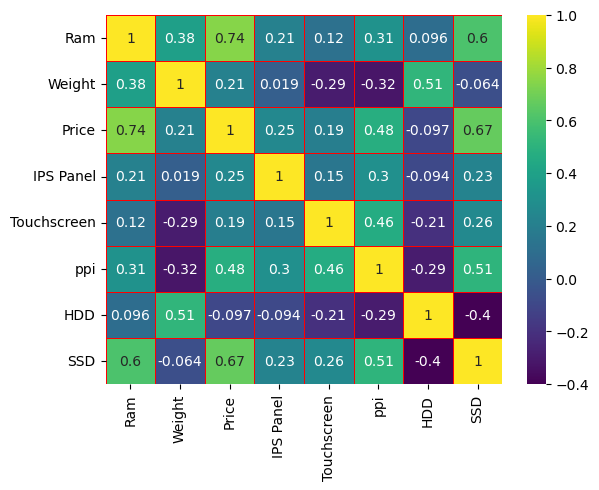

In [473]:
sns.heatmap(df.corr(), annot=True, cmap='viridis',linewidth=0.5,linecolor='Red')
plt.show()

The code calculates the correlations between the 'Price' column and other columns in the DataFrame 'df'.

- **correlations = df.corr()['Price']**:
  This line computes the correlation coefficients between the 'Price' column and all other columns in the DataFrame 'df'.

A bar plot is then created using Seaborn's `sns.barplot` to visualize the correlations with the 'Price' column.

- **sns.barplot(x=correlations.index, y=correlations.values)**:
  This line generates a bar plot where the x-axis represents column names, and the y-axis represents the corresponding correlation values with the 'Price' column.


Overall, this code generates a bar plot that visualizes the correlation of different columns with the 'Price' column in the DataFrame.


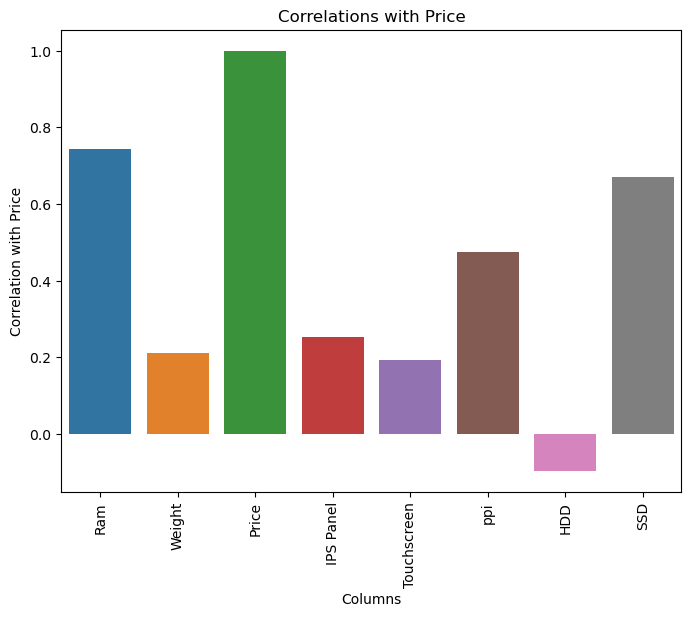

In [475]:
correlations = df.corr()['Price']
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation='vertical')
plt.xlabel('Columns')
plt.ylabel('Correlation with Price')
plt.title('Correlations with Price')
plt.show()

## Model Selection <a id="model-selection"></a>
Discuss the process of choosing a suitable model.

In [485]:
df.drop(columns=(['Cpu','Memory','Gpu','OpSys']),inplace=True)

In [488]:
df.drop(columns=(['cpu name']),inplace=True)

In [494]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

##  Import ML functions

In [495]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.15, random_state=2)

In [500]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error , r2_score

from sklearn.linear_model import LinearRegression

- **sklearn.model_selection: train_test_split**: This library provides the `train_test_split` function that helps split your dataset into training and testing subsets for model evaluation.

- **sklearn.compose: ColumnTransformer**: The `ColumnTransformer` class in this library allows you to apply different preprocessing steps to different subsets of features, streamlining feature transformation.

- **sklearn.pipeline: Pipeline**: The `Pipeline` class simplifies constructing and executing sequences of data transformations followed by a final estimator, like a machine learning model.

- **sklearn.preprocessing: OneHotEncoder**: `OneHotEncoder` is used to transform categorical variables into a numerical format (one-hot encoding), crucial for various machine learning algorithms.

- **sklearn.metrics: mean_absolute_error**: The `mean_absolute_error` function computes the average absolute difference between predicted and actual values, providing a measure of model performance.

- **sklearn.metrics: r2_score**: The `r2_score` function calculates the coefficient of determination (R-squared), indicating the proportion of variance explained by the model.

- **sklearn.linear_model: LinearRegression**: The `LinearRegression` class lets you create and train linear regression models, which model relationships between variables using a linear equation.


# Linear Regression Model 

## Model Evaluation <a id="model-evaluation"></a>

The code outlines a machine learning pipeline consisting of data preprocessing and a Linear Regression model.

1. **Data Preprocessing**:

   - A `ColumnTransformer` named 'step1' is defined. It uses `OneHotEncoder` to transform categorical features in columns 0, 1, 7, 10, and 11. Other columns remain unchanged ('remainder='passthrough'').

2. **Linear Regression Model**:

   - A Linear Regression model is instantiated as 'step2'.

3. **Pipeline Construction**:

   - A pipeline named 'pipe' is constructed using the defined transformers and estimator:
     - 'step1' transforms categorical features using one-hot encoding.
     - 'step2' applies the Linear Regression model.

4. **Pipeline Fitting and Predictions**:

   - The pipeline ('pipe') is fitted to the training data ('X_train' and 'y_train').
   - Predictions are made using the pipeline on the test data ('X_test').

5. **Model Evaluation and Output**:

   - The R-squared score ('r2score'), Mean Absolute Error ('mea'), and price variance are calculated.
   - The calculated values are used to format and print the results:
     - "R2 Score:    {value}%"
     - "MEA:         {value}%"
     - "Price Variance: {value}$"

Overall, this code constructs a pipeline that preprocesses the data and uses a Linear Regression model to predict and evaluate the target variable. It then prints the evaluation metrics and price variance in formatted output.


In [525]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
r2score=r2_score(y_test,y_pred)
mea=mean_absolute_error(y_test,y_pred)
price_variance=np.exp(mea)
print("R2 Score :\t{:.3F} %".format(r2score*100))
print("MEA :\t \t{:.3F} %".format(mea*100))
print("Price Variance :{:.3F} $".format(price_variance))

R2 Score :	80.733 %
MEA :	 	21.018 %
Price Variance :1.234 $


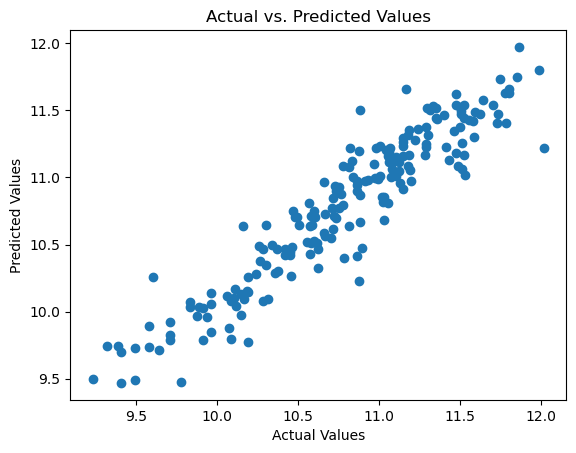

In [552]:
# Plotting actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [546]:
#accurecy
y_pred = pipe.predict(X_test)

predict=pd.DataFrame({'prediction' : np.exp(y_pred), 'Actual':np.exp(y_test), "diff": abs(np.exp(y_pred)-np.exp(y_test))})
predict

,prediction,Actual,diff
248,45049.034686,35964.0,9085.034686
555,16120.882737,11934.0,4186.882737
1251,23334.969140,21258.0,2076.969140
547,31703.208475,24634.0,7069.208475
885,55868.190345,95850.0,39981.809655
...,...,...,...
1129,70456.490118,60153.0,10303.490118
172,17549.625812,16463.0,1086.625812
322,56020.020854,58288.0,2267.979146
996,68978.949385,71874.0,2895.050615


# Random Forest Model

In [547]:
from sklearn.ensemble import RandomForestRegressor

- **sklearn.ensemble: RandomForestRegressor**: This library provides the `RandomForestRegressor` class, which is an ensemble machine learning model that uses a collection of decision trees to make predictions and is particularly effective for regression tasks.


The code sets up a machine learning pipeline using a combination of data preprocessing and a Random Forest Regressor model.

1. **Data Preprocessing**:

   - A `ColumnTransformer` named 'step1' is defined. It uses `OneHotEncoder` to transform categorical features in columns 0, 1, 7, 10, and 11. Other columns remain unchanged ('remainder='passthrough'').

2. **Random Forest Regressor Model**:

   - A Random Forest Regressor model is instantiated as 'step2':
     - 'n_estimators': Number of decision trees in the forest (100 trees).
     - 'random_state': Seed for random number generation (3) to ensure reproducibility.
     - 'max_samples': Maximum proportion of samples to use for each tree (50% of samples).
     - 'max_features': Maximum proportion of features to use for each tree (75% of features).
     - 'max_depth': Maximum depth of individual trees (15 levels).

3. **Pipeline Construction**:

   - A pipeline named 'pipe' is constructed using the defined transformers and estimator:
     - 'step1' transforms categorical features using one-hot encoding.
     - 'step2' applies the Random Forest Regressor model.

4. **Pipeline Fitting and Predictions**:

   - The pipeline ('pipe') is fitted to the training data ('X_train' and 'y_train').
   - Predictions are made using the pipeline on the test data ('X_test').

5. **Model Evaluation and Output**:

   - The R-squared score ('r2score'), which measures the proportion of variance in the dependent variable explained by the model, is calculated.
   - The Mean Absolute Error ('mea'), which computes the average absolute difference between predicted and actual values, is calculated.
   - The price variance is calculated as the exponential of the Mean Absolute Error.
   - The calculated values are used to format and print the results:
     - "R2 Score:    {value}%"
     - "MEA:         {value}%"
     - "Price Variance: {value}$"

Overall, this code constructs a pipeline that preprocesses the data and uses a Random Forest Regressor model to predict and evaluate the target variable. It then calculates and displays the R2 score, MEA, and price variance in formatted output.


In [548]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False, drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                             max_samples=0.5,
                             max_features=0.75,
                             max_depth=15)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
    
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)
r2score=r2_score(y_test,y_pred)
mea=mean_absolute_error(y_test,y_pred)
price_variance=np.exp(mea)
print("R2 Score :\t{:.3F} %".format(r2score*100))
print("MEA :\t \t{:.3F} %".format(mea*100))
print("Price Variance :{:.3F} $".format(price_variance))

R2 Score :	88.403 %
MEA :	 	16.051 %
Price Variance :1.174 $


In [549]:
#accurecy
y_pred = pipe.predict(X_test)

predict=pd.DataFrame({'prediction' : np.exp(y_pred), 'Actual':np.exp(y_test), "diff": abs(np.exp(y_pred)-np.exp(y_test))})
predict

,prediction,Actual,diff
248,44673.990881,35964.0,8709.990881
555,17117.979607,11934.0,5183.979607
1251,18912.999331,21258.0,2345.000669
547,26123.568823,24634.0,1489.568823
885,72026.172352,95850.0,23823.827648
...,...,...,...
1129,75675.485550,60153.0,15522.485550
172,17833.971776,16463.0,1370.971776
322,59439.727987,58288.0,1151.727987
996,85342.854582,71874.0,13468.854582


# Conclusion

In the context of laptop price predictions, the machine learning model has demonstrated a strong performance.

- The R2 Score of 88.403% indicates that the model has successfully captured a substantial portion of the variance in laptop prices. This suggests that the model's predictions align well with the actual price values.

- The Mean Absolute Error (MEA) of 16.051% represents the average absolute difference between the predicted and actual laptop prices. A lower MEA indicates that the model's predictions are, on average, within a reasonable range of the actual prices.

- The Price Variance of 1.174$ signifies the level of price deviation observed in the model's predictions. A lower price variance suggests that the model's predictions are relatively consistent and accurate.

In summary, the machine learning model has achieved a high R2 score, low MEA, and minimal price variance, indicating its effectiveness in predicting laptop prices. This performance showcases the model's capability to make reliable price predictions, which could be valuable for various decision-making scenarios in the laptop market.


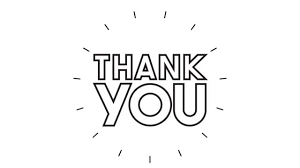